In [2]:
import pandas as pd
pd.options.display.max_columns = None
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sidetable

In [3]:
df_prof = pd.read_csv("../Archivos/profesionales_nonull.csv", index_col= 0)

In [4]:
df_noprof = pd.read_csv("../Archivos/no_profesionales.csv", index_col= 0)

In [5]:
columnas_b = df_noprof.columns[-7:].tolist()

In [6]:
columnas_b

['q29b_productos_familiar_cloud_computing',
 'q31b_productos_familiar_ml',
 'q32b_productos_familiar_bd',
 'q34b_herramientas_familiar_bi',
 'q36b_cat_herramientas_familiar_ml',
 'q37b_cat_herramientas_familiar_ml_aut',
 'q38b_herramientas_familiar_gest_exp_ml']

In [7]:
for i in columnas_b:
    print(i, "-->", df_noprof[i].isnull().sum()*100/df_noprof.shape[0])

q29b_productos_familiar_cloud_computing --> 35.02844141069397
q31b_productos_familiar_ml --> 21.205915813424348
q32b_productos_familiar_bd --> 25.494880546075084
q34b_herramientas_familiar_bi --> 29.158134243458477
q36b_cat_herramientas_familiar_ml --> 33.70875995449374
q37b_cat_herramientas_familiar_ml_aut --> 52.58248009101251
q38b_herramientas_familiar_gest_exp_ml --> 38.532423208191126


In [8]:
def data_pregunta(dataf, colum):
    df = dataf[["genero", "puesto_trabajo", colum]]
    df[colum] = df[colum].str.split(",")
    df = df.explode(colum)
    return df

In [ ]:
df_q29b_prof = data_pregunta(df_noprof, 'q29b_productos_familiar_cloud_computing')
df_q31b = data_pregunta(df_noprof, 'q31b_productos_familiar_ml')
df_q32b = data_pregunta(df_noprof, 'q32b_productos_familiar_bd')
df_q34b = data_pregunta(df_noprof, 'q34b_herramientas_familiar_bi')
df_q36b = data_pregunta(df_noprof, 'q36b_cat_herramientas_familiar_ml')
df_q37b = data_pregunta(df_noprof, 'q37b_cat_herramientas_familiar_ml_aut')
df_q38b = data_pregunta(df_noprof, 'q38b_herramientas_familiar_gest_exp_ml')

In [9]:
df_q29b = data_pregunta(df_noprof, 'q29b_productos_familiar_cloud_computing')
df_q31b = data_pregunta(df_noprof, 'q31b_productos_familiar_ml')
df_q32b = data_pregunta(df_noprof, 'q32b_productos_familiar_bd')
df_q34b = data_pregunta(df_noprof, 'q34b_herramientas_familiar_bi')
df_q36b = data_pregunta(df_noprof, 'q36b_cat_herramientas_familiar_ml')
df_q37b = data_pregunta(df_noprof, 'q37b_cat_herramientas_familiar_ml_aut')
df_q38b = data_pregunta(df_noprof, 'q38b_herramientas_familiar_gest_exp_ml')

/tmp/ipykernel_333/1052660363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colum] = df[colum].str.split(",")
/tmp/ipykernel_333/1052660363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colum] = df[colum].str.split(",")
/tmp/ipykernel_333/1052660363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [10]:
columnas_b

['q29b_productos_familiar_cloud_computing',
 'q31b_productos_familiar_ml',
 'q32b_productos_familiar_bd',
 'q34b_herramientas_familiar_bi',
 'q36b_cat_herramientas_familiar_ml',
 'q37b_cat_herramientas_familiar_ml_aut',
 'q38b_herramientas_familiar_gest_exp_ml']

In [11]:
lista_df = [df_q29b, df_q31b, df_q32b, df_q34b, df_q36b, df_q37b, df_q38b]

In [12]:
dict_df = {columnas_b[i] : u for i, u in enumerate(lista_df)}

In [13]:
dict_df.keys()

dict_keys(['q29b_productos_familiar_cloud_computing', 'q31b_productos_familiar_ml', 'q32b_productos_familiar_bd', 'q34b_herramientas_familiar_bi', 'q36b_cat_herramientas_familiar_ml', 'q37b_cat_herramientas_familiar_ml_aut', 'q38b_herramientas_familiar_gest_exp_ml'])

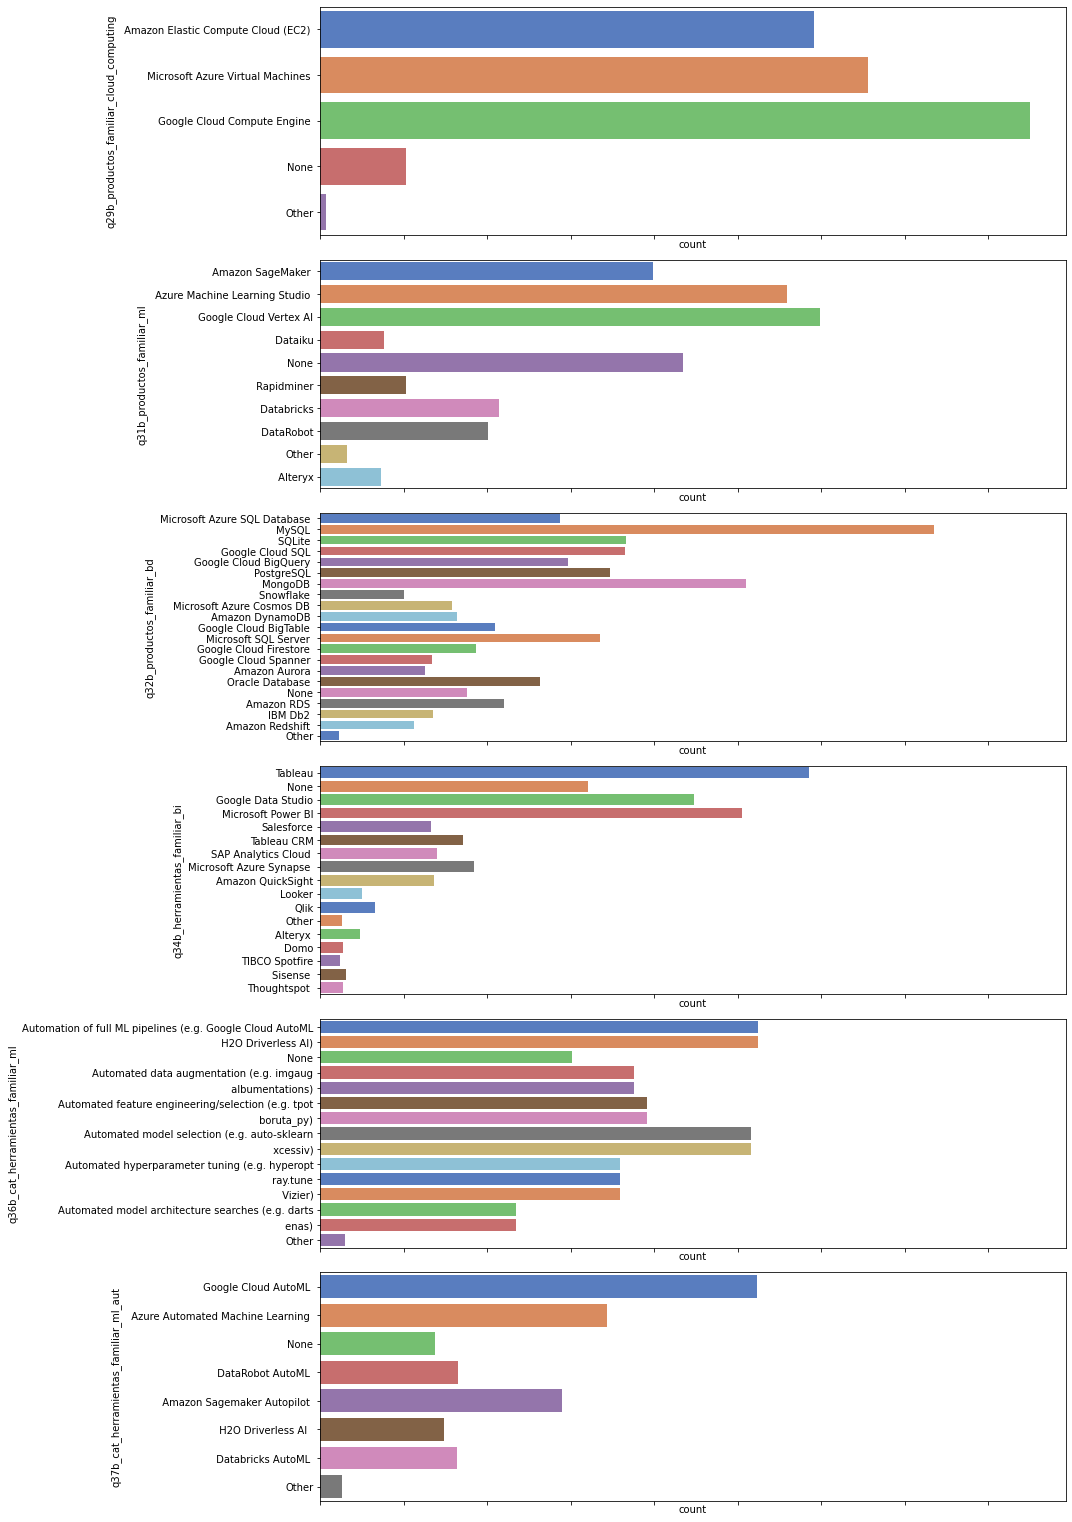

In [22]:
fig, axes = plt.subplots(7,1, figsize= (15,25), sharex= True)
axes = axes.flat
for indice, (k,v) in enumerate(dict_df.items()):
    sns.countplot(data = v, y = k, ax = axes[indice], palette="muted")

plt.tight_layout()
#axes[3].legend(bbox_to_anchor = (0.4,0.35))
fig.delaxes(axes[-1])
plt.show()

In [26]:
df_prof['q27_plat_familiar_cloud_computing'].isnull().sum() *100/df_prof.shape[0]

63.96438340219985

In [24]:
df_prof['q27_plat_familiar_cloud_computing'].value_counts()

None                                                                                                                                                     1095
 Amazon Web Services (AWS) , Microsoft Azure , Google Cloud Platform (GCP)                                                                                603
 Amazon Web Services (AWS) , Google Cloud Platform (GCP)                                                                                                  570
 Google Cloud Platform (GCP)                                                                                                                              566
 Amazon Web Services (AWS)                                                                                                                                460
                                                                                                                                                         ... 
 Amazon Web Services (AWS) , Microsoft Azure , IBM C

In [15]:
df_q36b['q36b_cat_herramientas_familiar_ml'].unique()

array(['Automation of full ML pipelines (e.g. Google Cloud AutoML',
       ' H2O Driverless AI)', nan, 'None',
       'Automated data augmentation (e.g. imgaug', ' albumentations)',
       'Automated feature engineering/selection (e.g. tpot',
       ' boruta_py)', 'Automated model selection (e.g. auto-sklearn',
       ' xcessiv)', 'Automated hyperparameter tuning (e.g. hyperopt',
       ' ray.tune', ' Vizier)',
       'Automated model architecture searches (e.g. darts', ' enas)',
       'Other'], dtype=object)

In [27]:
df_prof.columns

Index(['edad', 'genero', 'pais', 'estudios', 'puesto_trabajo', 'experiencia',
       'lenguaje_recomendado', 'experiencia_ML', 'industria', 'tamaño_empresa',
       'herramienta_DA', 'lenguaje_utilizado', 'IDE',
       'herramientas_visualizacion', 'Q16_frame_ml', 'Q17_alg_ml',
       'Q32_prod_bigdata', 'Q34_herramientas_bi', 'Q28', 'q10_notebooks',
       'q39_plat_compartir_trabajo', 'q40_plat_cursos',
       'q27_plat_familiar_cloud_computing',
       'q29b_productos_familiar_cloud_computing', 'q31b_productos_familiar_ml',
       'q32b_productos_familiar_bd', 'q34b_herramientas_familiar_bi',
       'q36b_cat_herramientas_familiar_ml',
       'q37b_cat_herramientas_familiar_ml_aut',
       'q38b_herramientas_familiar_gest_exp_ml', 'salario'],
      dtype='object')

In [28]:
df_prof["q29b_productos_familiar_cloud_computing"].value_counts()

 Amazon Elastic Compute Cloud (EC2) , Microsoft Azure Virtual Machines , Google Cloud Compute Engine           1447
 Google Cloud Compute Engine                                                                                    813
 Microsoft Azure Virtual Machines , Google Cloud Compute Engine                                                 507
 Amazon Elastic Compute Cloud (EC2) , Google Cloud Compute Engine                                               466
None                                                                                                            454
 Microsoft Azure Virtual Machines                                                                               389
 Amazon Elastic Compute Cloud (EC2)                                                                             342
 Amazon Elastic Compute Cloud (EC2) , Microsoft Azure Virtual Machines                                          161
Other                                                                   